<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


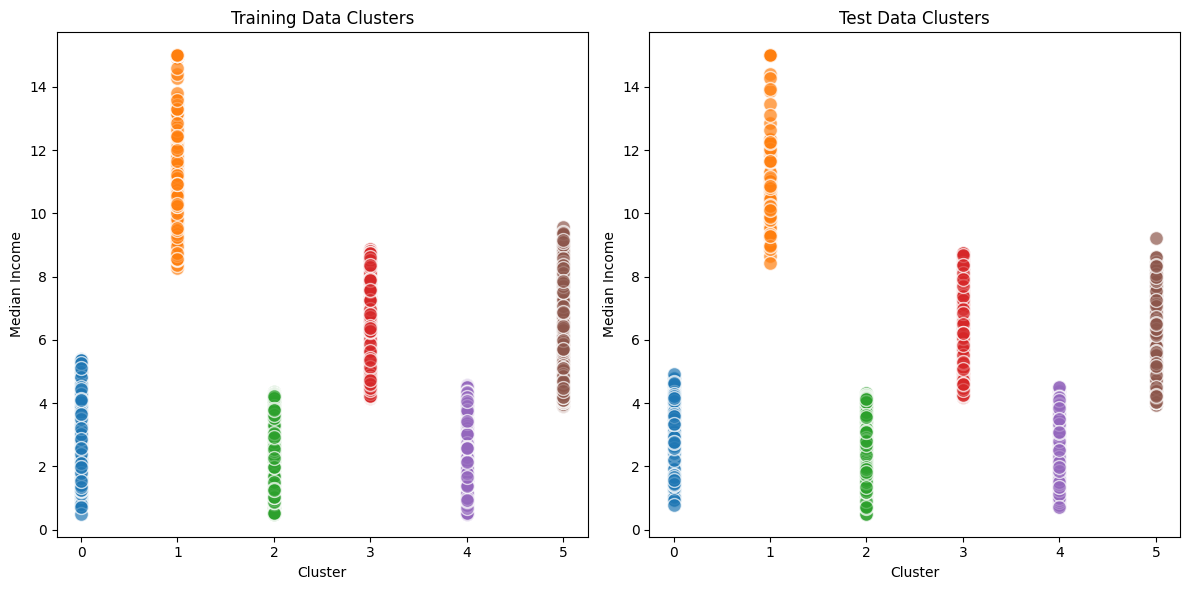

/home/vscode/.local/lib/python3.11/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/vscode/.local/lib/python3.11/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/vscode/.local/lib/python3.11/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/vscode/.local/lib/python3.11/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/hom

0.9570615310077519
0.9556686046511628


In [14]:
import numpy as np
import pandas as pd
import patsy
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



# Read data
df = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ryan/raw/housing.csv')

# See info
print(df.info())

# See data
print(df.head())

# Check for duplicates
print(f'''Duplicated: {df.duplicated().sum()}''')
duplicates = df[df.duplicated()]
print(duplicates)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Selecting features for clustering
features = df[['Latitude', 'Longitude', 'MedInc']]

# Classify data into clusters
model = KMeans(n_clusters=6, random_state=42)
df['cluster'] = model.fit_predict(df[['Latitude', 'Longitude', 'MedInc']])

# Splitting the data into train and test sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Fitting KMeans on the training data
model = KMeans(n_clusters=6, random_state=42)
X_train['cluster_train'] = model.fit_predict(X_train)

# Predicting clusters for the test data
X_test['cluster_test'] = model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
for cluster in range(6):
    cluster_data = X_train[X_train['cluster_train'] == cluster]
    plt.scatter([cluster] * len(cluster_data), cluster_data['MedInc'], alpha=0.7, edgecolors='w', s=100)
plt.title('Training Data Clusters')
plt.xlabel('Cluster')
plt.ylabel('Median Income')

# Plot for test data
plt.subplot(1, 2, 2)
for cluster in range(6):
    cluster_data = X_test[X_test['cluster_test'] == cluster]
    plt.scatter([cluster] * len(cluster_data), cluster_data['MedInc'], alpha=0.7, edgecolors='w', s=100)
plt.title('Test Data Clusters')
plt.xlabel('Cluster')
plt.ylabel('Median Income')

plt.tight_layout()
plt.show()

# Patsy formula
formula1 = 'cluster ~ MedInc + Latitude + Longitude'
y, X = dmatrices(formula1, data=df, return_type='dataframe')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict y
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compare accuracy scores
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test, y_test_pred))




